# Exercício de Regressão Linear

Estudaremos um conjunto de dados de uma Ecommerce baseada na cidade de Nova York que vende roupas online, mas também podem atender aos clientes na própria loja. Os clientes vem à loja, tem suas seções/reuniões com estilistas pessoais, e então, eles podem voltar para casa e encomendar o pedido via App ou Website da loja.

A companhia está tentando decidir se é melhor manter o foco na experiência do cliente no App ou nos seus Websites. 

Obs.: Os dados não são veridicos.

## Os dados

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Ecommerce Customers')

Vejamos quais informações estão disponibilizada para nós, e dentre estas, quais estão relacionadas com o nosso problema.

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Note que, temos disponível o email de cada cliente, seu endereço, avatar, tamanho médio de cada seção, o tempo gasto no App, o tempo gasto no Website, a duração da filiação, e os gastos anuais. Mais especificamente,

* Avg. Session Lenght: _tempo médio gasto nas seções dentro da loja com o seu estilista pessoal_ ;
* Time on App: _tempo médio gasto no App em minutos_ ;
* Time on Website: _tempo médio gasto no Website em minutos_ ;
* Length of Membership: _há quantos anos o cliente se tornou um membro_ .

Vejamos mais informações relevantes sobre os nossos dados.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análise de dados exploratória

Procuremos alguma coorrelação entre as observações feitas que estão nos dados. 

In [7]:
import seaborn as sns

In [9]:
sns.set()

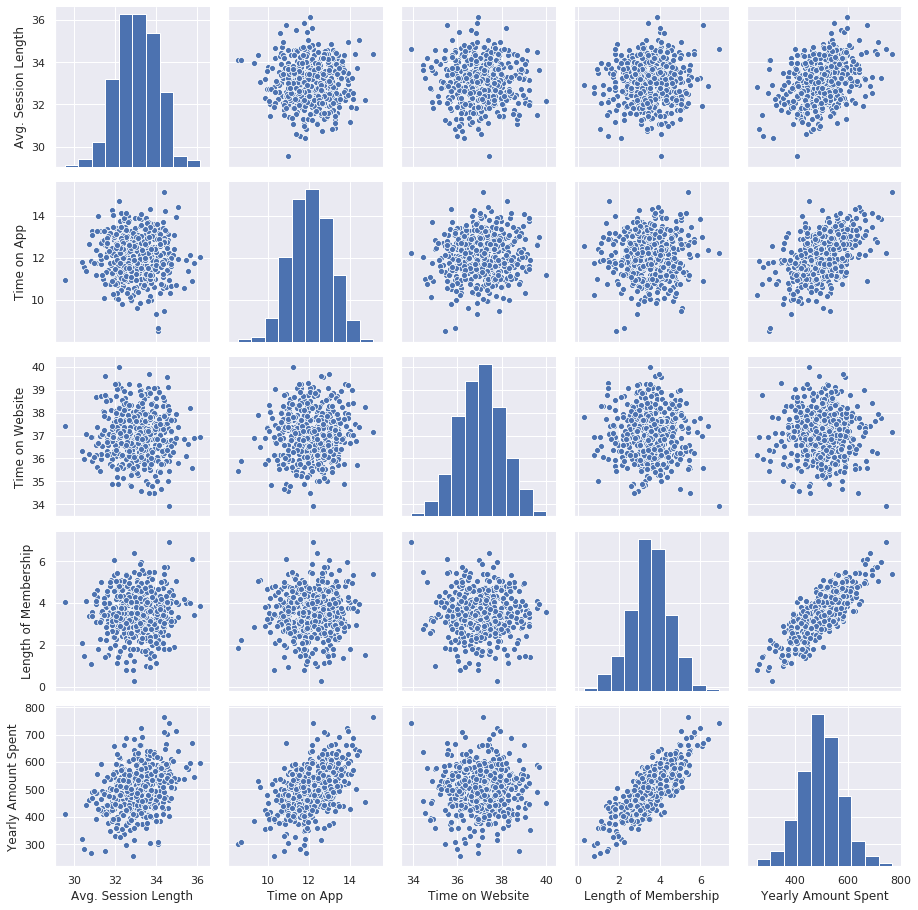

In [10]:
sns.pairplot(data)

Podemos verificar, então, que a quantidade gasta anualmente _(Yearly Amount Spent)_ e a duração da filiação como membro _(Length of Membership)_ estão correlacionadas, todavia, talvez isso não nos ajude de maneira clara, no nosso problema.

Mas, analisando os outros dados, conseguiríamos obter alguma outra informação sobre o nosso problema original _(Time on App vs. Time on Website)_ ?

Uma maneira de fazermos isto é criarmos um modelo de regressão linear, e treiná-lo com nossas observações, utilizando a biblioteca _sklearn_.

Seja X os atributos numéricos dos nossos dados com exceção da quantidade anual gasta.

In [45]:
X = data[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

Seja y as quantidades anuais gastas por cada cliente.

In [46]:
y = data['Yearly Amount Spent']

Nosso objetivo é usar X e y, com o objetivo de prever, dada quantidades de _'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'_ , a quantidade anual gasta por cada cliente, _'Yearly Amount Spent'_. Para isso, tentaremos usar um modelo de regressão linear. Todavia, verifiquemos a distribuição dos valores em y.

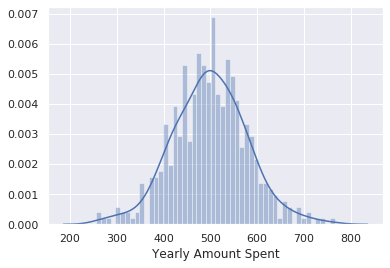

In [72]:
sns.distplot(y, bins = 50)

Observe então, que a distribuição dos nossos valores em y, estão distribuidas de maneira bem semelhantes à distribuição normal, o que nos serve de motivação para aplicarmos os nossos algoritmos de regressão linear.

In [73]:
from sklearn.model_selection import train_test_split

Separaremos as nossas observações para que o nosso modelo utilize uma quantidade fixa, mas escolhida aleatoriamente, para treinar, e outra quantidade, "nao conhecida" pelo modelo, para verificar as nossas previsões.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [53]:
lm.intercept_

-1047.9327822502387

Depois de treinado o nosso modelo, coletaremos as nossas previsões e verificaremos como elas estão relacionadas com as observações que separamos para testes. Estas separadas são os valores que foi concedido em nossos dados.

In [57]:
predictions = lm.predict(X_test)

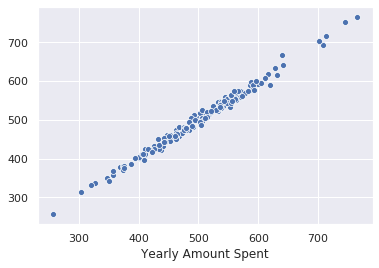

In [62]:
sns.scatterplot(y_test, predictions)

Observe que as nossas previsões estão correlacionadas de uma maneira favorável a nós, o que nos mostra que o nosso modelo funcionou de maneira adequada. Verifiquemos então, usando as métricas em _sklearn_, quais os erros médios de nossas previsões. Para isso, usaremos o _mean squared error_, que pune grandes diferenças, com a raiz quadrada.

In [66]:
import numpy as np
from sklearn import metrics

In [75]:
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root MSE: 8.933815066978656


Por fim, observemos a distribuição dos valores dos resíduos, erros, do nosso modelo.

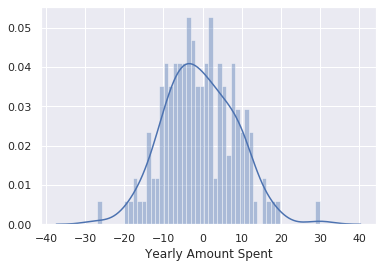

In [70]:
sns.distplot((y_test - predictions), bins = 50)

Assim, para responder nosso problema, verifiquemos os coeficientes dados pelo nosso modelo. Esses coeficientes nos mostrarm quanto varia a quantidade gasta anualmente, dado aumento em um atributo numérico em uma unidade. 

In [55]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeficientes'])
coef

,Coeficientes
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Esses coeficientes nos mostram que, uma pequena variação em cada um dos nossos atributos _('Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership')_ provocam uma alteração em _'Yearly Amount Spent'_ com magnitude proporcional ao coeficiente respectivo ao atributo.

Mais do que isso, chegamos a conclusões mais precisas:

* Quanto mais tempo o cliente ser filiado à loja, maior será o seu gasto anual ;
* Como o coeficiente do tempo gasto com o App _(Time on App)_ é maior que o coeficiente do tempo gasto no Website _(Time on Website)_, significa que cada minuto a mais gasto com o tempo no App contribui muito mais com a quantidade gasta anualmente por cada cliente.

Dessa forma, uma conclusão mais simplista seria dizer que a loja deveria gastar seus recursos para melhorar a qualidade do serviço relacionado ao App, ao invés de gastar com a qualidade do serviço relacionado ao Website, já que, esta contribui menos para o total gasto anualmente do que aquela. Todavia, os desenvolvedores do Website poderiam se esforçar ou desenvolver métodos para que os seus resultados fossem parecidos com os resultados dos desenvolvedores do App.

Não obstante, é necessário estudar as relações entre o tempo de filiação e o tempo gasto em cada um dos sistemas, para que, a escolha, desenvolver o App ou o Website, não seja comprometida. 

_Exemplo:_

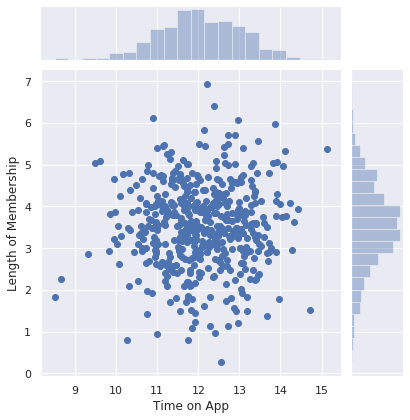

In [80]:
sns.jointplot('Time on App','Length of Membership', data = data)

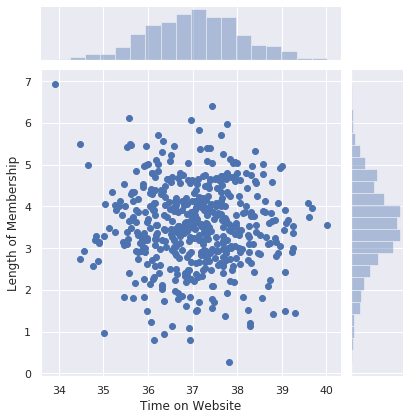

In [81]:
sns.jointplot('Time on Website','Length of Membership', data = data)